# Aula 5 - Teste de hipóteses

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
https://sites.icmc.usp.br/francisco <br>
Copyright: Creative Commons

<hr>

Vamos resolver alguns exemplos usando simulação de Monte Carlo. Esses exemplos foram discutidos na aula.

**Exemplo**: Uma fábrica anuncia que o índice de nicotina dos cigarros de uma dada marca é igual a 20 mg por cigarro. Um laboratório realiza 20 análises do índice obtendo: 22, 19, 21, 22, 20, 18, 27, 20, 21, 19, 20, 22, 17, 20, 21,18, 25, 16, 20, 21. Sabe-se que o índice de nicotina dos cigarros dessa marca se distribui normalmente com variância 4 mg$^2$. Pode-se aceitar a afirmação do fabricante, ao nível de 5%?

$H_0: \mu = 20$<br>
$H_1: \mu > 20$

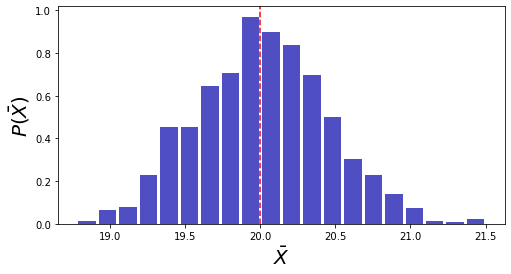

In [1]:
import numpy as np
import matplotlib.pyplot as plt

mu = 20 # hipotese a ser testada
sigma = 2 # desvio padrao populacional
n = 20 #tamanho da amostra
Ns = 1000 # numero de simulacoes
Xm=[] #distribuicao da media amostral
for s in range(1,Ns):
    x = np.random.normal(mu, sigma, n) # sorteia uma amostra de tamanho n
    Xm.append(np.mean(x))
plt.figure(figsize=(8,4))
a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, label = str(Ns), density=True)
plt.axvline(x=mu, color='r', linestyle='--', label = 'Media')
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.show(True)  

Depois de gerar as amostras, vamos verificar a fração de observações que permitem que aceitemos $H_0$.

In [2]:
X = [22, 19, 21, 22, 20, 18, 27, 20, 21, 19, 20, 22, 17, 20, 21,18, 25, 16, 20, 21]
xobs = np.mean(X)

alpha = 95
xc = np.percentile(Xm, alpha)
print('Xc=',xc,'  Xobs = ', xobs)
if(xobs < xc):
    print("Aceitamos H0")
else:
    print("Rejeitamos H0")

Xc= 20.73952000201963   Xobs =  20.45
Aceitamos H0


Podemos ainda ver esse resultado na figura.

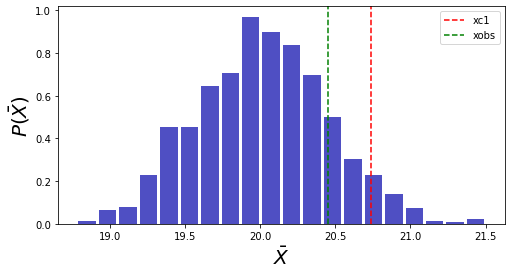

In [3]:
plt.figure(figsize=(8,4))
a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, density=True)
plt.axvline(x=xc, color='red', linestyle='--', label = 'xc1')
plt.axvline(x=xobs, color='green', linestyle='--', label = 'xobs')
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.legend()
plt.show(True) 

**Exemplo**: Um pesquisador deseja estudar o efeito de certa substância no tempo de reação de seres vivos a um certo tipo de estímulo. Um experimento é desenvolvido com cobaias, que são inoculadas com a substância e submetidas a um estímulo elétrico, com seus tempos de reação (em segundos) anotados. Os seguintes valores foram obtidos:
T = [9,1;9,3;7,2;13,3;10,9;7,2;9,9;8,0;8,6;7,5]<br>
Admite-se que, em geral,  o tempo de reação tem distribuição Normal com média 8 segundos e desvio padrão 2 segundos. Entretanto, o pesquisador desconfia que o tempo médio sofre alteração por influência da substância. Verifique a nível 6% se o tempo de reação das cobaias submetidas à substância foi alterado.

$H_0: \mu = 8$<br>
$H_1: \mu \neq 8$

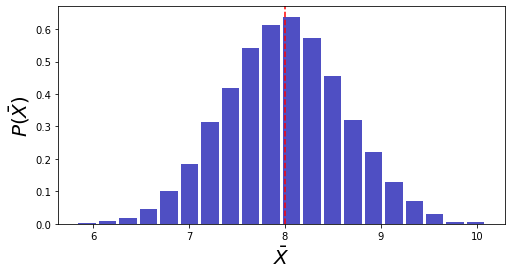

In [4]:
import numpy as np
import matplotlib.pyplot as plt

mu = 8
sigma = 2
n = 10
Ns = 10000
Xm=[] #distribuicao da media amostral
for s in range(1,Ns):
    x = np.random.normal(mu, sigma, n) # sorteia uma amostra de tamanho n
    Xm.append(np.mean(x))
plt.figure(figsize=(8,4))
a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, label = str(Ns), density=True)
plt.axvline(x=mu, color='r', linestyle='--', label = 'Media')
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.show(True)  

In [5]:
X = [9.1,9.3,7.2,13.3,10.9,7.2,9.9,8.0,8.6,7.5]
xobs = np.mean(X)

alpha = 3
xc1 = np.percentile(Xm, alpha)
xc2 = np.percentile(Xm, 100-alpha)
print('Xc1=',xc1, '  Xc2=', xc2, '  Xobs = ', xobs)
if(xobs < xc1 or xobs > xc2):
    print("Rejeitamos H0")
else:
    print("Aceitamos H0")

Xc1= 6.841465903917631   Xc2= 9.171503375228156   Xobs =  9.1
Aceitamos H0


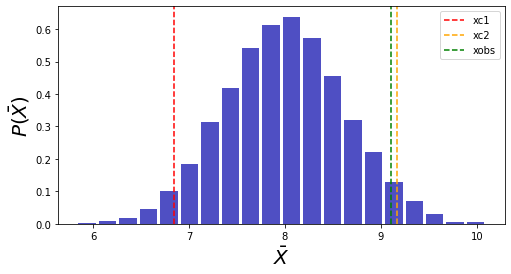

In [6]:
plt.figure(figsize=(8,4))
a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, density=True)
plt.axvline(x=xc1, color='red', linestyle='--', label = 'xc1')
plt.axvline(x=xc2, color='orange', linestyle='--', label = 'xc2')
plt.axvline(x=xobs, color='green', linestyle='--', label = 'xobs')
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.legend()
plt.show(True) 

# Valor p

Vamos considerar um exemplo. Sejam as hipóteses:<br>
$H_0: \mu = 10$<br>
$H_1: \mu < 10$<br>
Assumimos que a população tem distribuição uniforme com desvio padrão $\sigma$, definido abaixo.

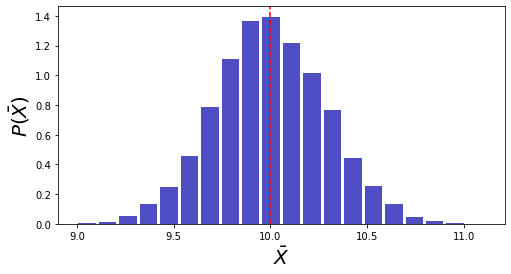

In [7]:
import numpy as np
import matplotlib.pyplot as plt

mu = 10
sigma = 2
n = 50
Ns = 10000
Xm=[] #distribuicao da media amostral
for s in range(1,Ns):
    x = np.random.normal(mu, sigma, n) # sorteia uma amostra de tamanho n
    Xm.append(np.mean(x))
plt.figure(figsize=(8,4))
a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, label = str(Ns), density=True)
plt.axvline(x=mu, color='r', linestyle='--', label = 'Media')
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.show(True)  


Vamos supor que o valor observado $\bar{x}_{obs}$ é definido abaixo. De acordo com o nível de significância, podemos aceitar ou rejeitar $H_0$, conforme vemos abaixo.

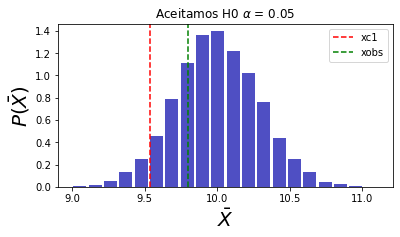

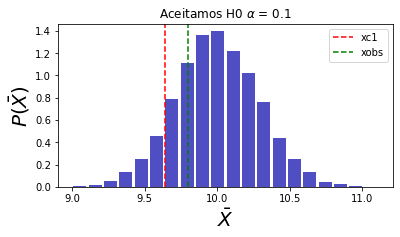

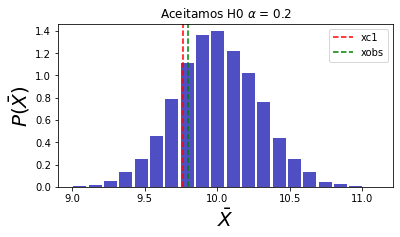

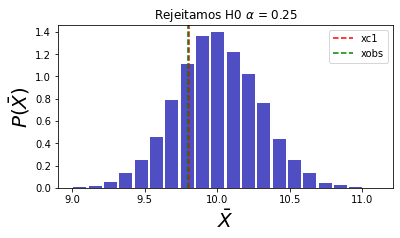

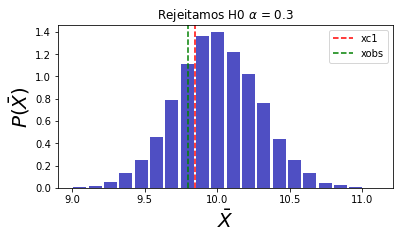

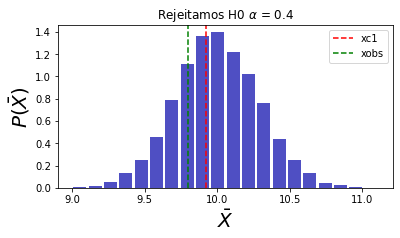

In [8]:
xobs = 9.8
alphas = [5,10,20,25, 30,40]
for alpha in alphas:
    xc = np.percentile(Xm, alpha)
    plt.figure(figsize=(6,3))
    a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, density=True)
    plt.axvline(x=xc, color='red', linestyle='--', label = 'xc1')
    plt.axvline(x=xobs, color='green', linestyle='--', label = 'xobs')
    plt.xlabel(r'$\bar{X}$', fontsize=20)
    plt.ylabel(r'$P(\bar{X})$', fontsize=20)
    plt.legend()
    if(xobs < xc):
        plt.title("Rejeitamos H0"+r' $\alpha$ = ' + str(alpha/100))
    else:
        plt.title("Aceitamos H0"+r' $\alpha$ = ' + str(alpha/100))
    plt.show(True) 

O valor de $\alpha$ em que há a transição entre aceitar ou rejeitar $H_0$ é o valor p.

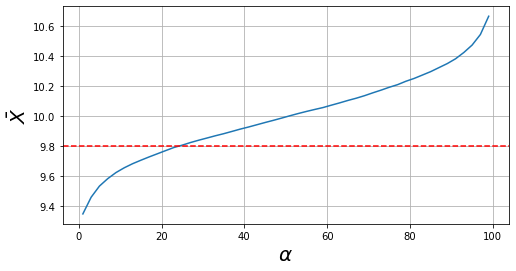

In [9]:
import numpy as np

xobs = 9.8
xcs = []
alphas = []
for alpha in np.arange(1,100,2):
    xc = np.percentile(Xm, alpha)
    xcs.append(xc)
    alphas.append(alpha)
    
plt.figure(figsize=(8,4))
plt.plot(alphas,xcs)
plt.axhline(y=xobs, color='r', linestyle='--', label = 'Media')
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'$\bar{X}$', fontsize=20)

plt.grid(True)
plt.show(True)

Podemos calcular o valor p: $P(\bar{X} > \bar{x}_{obs}|\mu=\mu_0) = \alpha$:

In [10]:
pvalue = 0
for i in range(0, len(Xm)):
    if(Xm[i] < xobs):
        pvalue = pvalue + 1
pvalue = pvalue/len(Xm)
print('P-valor: ', pvalue)

P-valor:  0.24102410241024103


Mostrando no gráfico anterior.

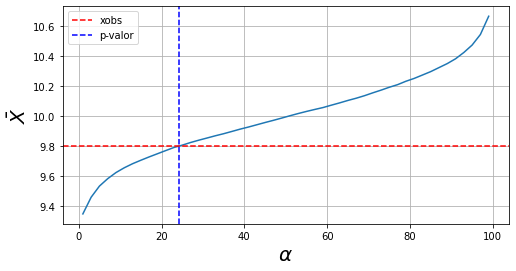

In [11]:
xobs = 9.8
xcs = []
alphas = []
for alpha in np.arange(1,100,2):
    xc = np.percentile(Xm, alpha)
    xcs.append(xc)
    alphas.append(alpha)
    
plt.figure(figsize=(8,4))
plt.plot(alphas,xcs)
plt.axhline(y=xobs, color='red', linestyle='--', label = 'xobs')
plt.axvline(x=pvalue*100, color='blue', linestyle='--', label = 'p-valor')
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'$\bar{X}$', fontsize=20)
plt.legend()
plt.grid(True)
plt.show(True)

## Comparação de duas médias

Uma das principais aplicações do teste de hipóteses é na seleção de atributos. Vamos comparar duas distribuições e verificar se elas possuem a mesma média. Vamos formular as hipóteses:
$$
H_0: \mu_1 = \mu_2
$$
$$
H_a: \mu_1 \neq \mu_2
$$

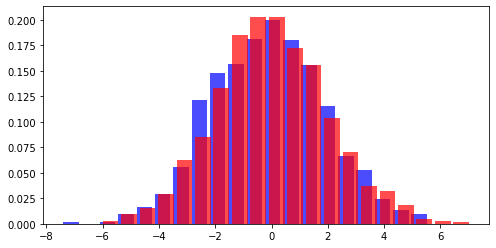

In [12]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
mu1 = 0
sigma1 = 2
x1 = np.random.normal(mu1, sigma1, n) # sorteia uma amostra de tamanho n

mu2 = 0
sigma2 = 2
x2 = np.random.normal(mu2, sigma2, n) # sorteia uma amostra de tamanho n

plt.figure(figsize=(8,4))
a1 = plt.hist(x=x1, bins=20, color='blue', alpha=0.7, rwidth=0.85, density=True)
a2 = plt.hist(x=x2, bins=20, color='red', alpha=0.7, rwidth=0.85, density=True)
plt.show(True)  

Fazendo um teste de hipóteses para comparar as médias das duas distribuições:

In [13]:
from scipy import stats

t_stat, p = stats.ttest_ind(x1,x2)
print(f't={t_stat}, p={p}')

t=-1.919460425221513, p=0.055068366916075855


Ou seja, como o valor p é alto, podemos concluir que as distribuições possuem a mesma média (aceitamos $H_0$)

Vamos agora considerar duas distribuições com médias distintas.

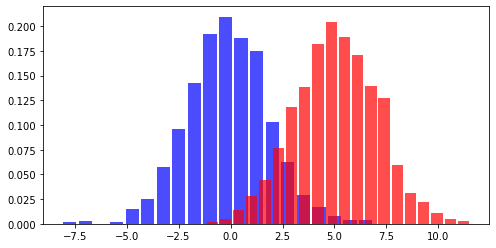

In [14]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
mu1 = 0
sigma1 = 2
x1 = np.random.normal(mu1, sigma1, n) # sorteia uma amostra de tamanho n

mu2 = 5
sigma2 = 2
x2 = np.random.normal(mu2, sigma2, n) # sorteia uma amostra de tamanho n

plt.figure(figsize=(8,4))
a1 = plt.hist(x=x1, bins=20, color='blue', alpha=0.7, rwidth=0.85, density=True)
a2 = plt.hist(x=x2, bins=20, color='red', alpha=0.7, rwidth=0.85, density=True)
plt.show(True)  

In [15]:
from scipy import stats

t_stat, p = stats.ttest_ind(x1,x2)
print(f't={t_stat}, p={p}')

t=-59.27589735653996, p=0.0


Nesse segundo caso, vemos que o valor p é igual a zero, o que nos permite rejeitar $H_0$

Portanto, podemos usar o teste de hipóteses para realizar uma seleção de atributos, onde atributos que não conseguem discriminar duas classes, devem ser removidos do conjunto de dados.

## Seleção de atributos

Vamos incialmente gerar um conjunto de dados, onde as duas primeiras colunas possuem a mesma média para duas classes, mas as outras duas permite separar as classes.

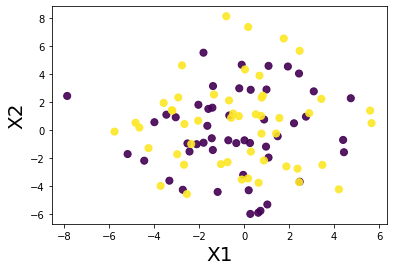

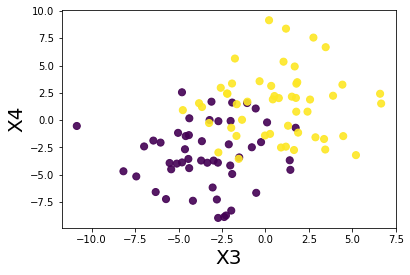

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# duas primeiras variaveis
centers = [(0, 0), (0, 0)]
data = make_blobs(n_samples=100, centers=centers, cluster_std=3, shuffle=False, random_state=42)
X1 = data[0] # atributos das observacoes
y = data[1] # classe conhecida inicialmente
# mostra os dados
plt.scatter(X1[:,0], X1[:,1], c=y, cmap='viridis', s=50, alpha=0.9)
plt.xlabel('X1', fontsize=20)
plt.ylabel('X2', fontsize=20)
plt.show(True)

# terceira e quarta variaveis
centers = [(-3, -3), (1,1)]
data = make_blobs(n_samples=100, centers=centers, cluster_std=3, shuffle=False, random_state=42)
X2 = data[0] # atributos das observacoes
y = data[1] # classe conhecida inicialmente
# mostra os dados
plt.scatter(X2[:,0], X2[:,1], c=y, cmap='viridis', s=50, alpha=0.9)
plt.xlabel('X3', fontsize=20)
plt.ylabel('X4', fontsize=20)
plt.show(True)

Note quem as duas últimas variáveis permitem separar os dados tanto nos eixos x quando y.

Vamos construir um conjunto único com os dados gerados.

In [17]:
X = np.column_stack((X1,X2))
print(X)

[[ 1.49014246e+00 -4.14792904e-01 -1.50985754e+00 -3.41479290e+00]
 [ 1.94306561e+00  4.56908957e+00 -1.05693439e+00  1.56908957e+00]
 [-7.02460124e-01 -7.02410871e-01 -3.70246012e+00 -3.70241087e+00]
 [ 4.73763845e+00  2.30230419e+00  1.73763845e+00 -6.97695813e-01]
 [-1.40842316e+00  1.62768013e+00 -4.40842316e+00 -1.37231987e+00]
 [-1.39025308e+00 -1.39718926e+00 -4.39025308e+00 -4.39718926e+00]
 [ 7.25886815e-01 -5.73984073e+00 -2.27411319e+00 -8.73984073e+00]
 [-5.17475350e+00 -1.68686259e+00 -8.17475350e+00 -4.68686259e+00]
 [-3.03849336e+00  9.42741998e-01 -6.03849336e+00 -2.05725800e+00]
 [-2.72407223e+00 -4.23691110e+00 -5.72407223e+00 -7.23691110e+00]
 [ 4.39694631e+00 -6.77328901e-01  1.39694631e+00 -3.67732890e+00]
 [ 2.02584614e-01 -4.27424456e+00 -2.79741539e+00 -7.27424456e+00]
 [-1.63314817e+00  3.32767769e-01 -4.63314817e+00 -2.66723223e+00]
 [-3.45298073e+00  1.12709406e+00 -6.45298073e+00 -1.87290594e+00]
 [-1.80191607e+00 -8.75081249e-01 -4.80191607e+00 -3.87508125e

Vamos fazer a classificação usando todo o conjunto de dados.

In [18]:
from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy: ', model.score(x_test, y_test))

Accuracy:  0.9


Para realizar a seleção dos atributos, usamos Anova (https://pt.wikipedia.org/wiki/An%C3%A1lise_de_vari%C3%A2ncia), que usa o teste de hipóteses.

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


fvalue_selector = SelectKBest(f_classif, k=2) #seleciona os dois atributos mais importantes usando teste de hipoteses

X_kbest = fvalue_selector.fit_transform(X, y)

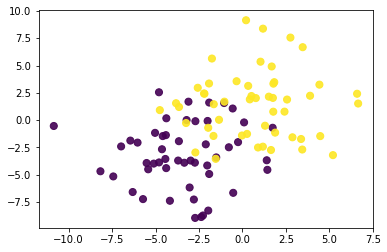

In [20]:
plt.scatter(X_kbest[:,0], X_kbest[:,1], c=y, cmap='viridis', s=50, alpha=0.9)
plt.show(True)

Notamos que quando selecionamos os dois principais atributos, o métod escolhe os atributos 3 e 4, conforme o esperado (veja o gráfico anterior).

Realizando a classificação usando apenas os atributos selecionados:

In [21]:
from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X_kbest, y, test_size = p, random_state = 42)

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy: ', model.score(x_test, y_test))

Accuracy:  0.9


Logo, vemos que mesmo usando dois atributos, mantemos a taxa de acertos. Portanto, a seleção de atributos permitiu um modelo mais simples (com menos atributos), mas com o mesmo desempenho.

## Exercicios de fixação

1 - Uma fábrica anuncia que o índice de nicotina dos cigarros de uma dada marca é igual a 20 mg por cigarro. Um laboratório realiza 20 análises do índice obtendo: 22, 19, 21, 22, 20, 18, 27, 20, 21, 19, 20, 22, 17, 20, 21,18, 25, 16, 20, 21. Sabe-se que o índice de nicotina dos cigarros dessa marca se distribui normalmente com variância 4 mg$^2$. Pode-se aceitar a afirmação do fabricante, ao nível de 10% e 1%?

$H_0: \mu = 20$<br>
$H_1: \mu > 20$

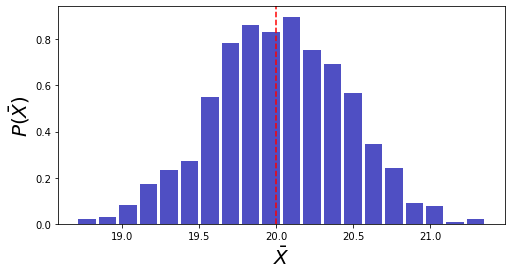

In [22]:
# Gerando as amostras
import numpy as np
import matplotlib.pyplot as plt

mu = 20 # hipotese a ser testada
sigma = 2 # desvio padrao populacional com variância=4
n = 20 #tamanho da amostra
Ns = 1000 # numero de simulacoes
Xm=[] #distribuicao da media amostral
for s in range(1,Ns):
    x = np.random.normal(mu, sigma, n) # sorteia uma amostra de tamanho n
    Xm.append(np.mean(x))
plt.figure(figsize=(8,4))
a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, label = str(Ns), density=True)
plt.axvline(x=mu, color='r', linestyle='--', label = 'Media')
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.show(True) 

Verificando a fração de observações que permitem que aceitemos $H_0$.

In [29]:
# verificar a fração de observações que permitem que aceitemos $H_0$ para nivel=10% e 1%
X = [22, 19, 21, 22, 20, 18, 27, 20, 21, 19, 20, 22, 17, 20, 21,18, 25, 16, 20, 21]

xobs = np.mean(X)

alpha = [1, 10]

for i in alpha:
    xc = np.percentile(Xm, (100-i))
    print('Para nivel de significância:', i, '%')
    print('Xc=',xc,'  Xobs = ', xobs)
    if(xobs < xc):
        print("Aceitamos H0")
    else:
        print("Rejeitamos H0")


Para nivel de significância: 1 %
Xc= 21.00585180146308   Xobs =  20.45
Aceitamos H0
Para nivel de significância: 10 %
Xc= 20.573404203223827   Xobs =  20.45
Aceitamos H0


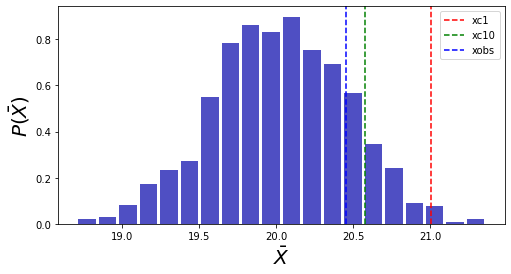

In [31]:
# Vendo o resultado numa figura

xc1 = np.percentile(Xm, 100-alpha[0])
xc10  = np.percentile(Xm, 100-alpha[1])

plt.figure(figsize=(8,4))
a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, density=True)
plt.axvline(x=xc1, color='red', linestyle='--', label = 'xc1')
plt.axvline(x=xc10, color='green', linestyle='--', label = 'xc10')
plt.axvline(x=xobs, color='blue', linestyle='--', label = 'xobs')
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.legend()
plt.show(True) 

In [39]:
# Calculando X crítico com statsmodels
import statsmodels

alpha = [0.01, 0.10]
xc1 = stats.norm(20, 2).ppf((1-alpha[0]))
xc10  = stats.norm(20, 2).ppf((1-alpha[1]))

alpha = [1, 10]
xc = [xc1, xc10]

# para alpha 0.01
print('Para nivel de significância:', alpha[0], '%')
print('Xc=',xc[0],'  Xobs = ', xobs)
if(xobs < xc[0]):
    print("Aceitamos H0")
else:
    print("Rejeitamos H0")
    
# para alpha 0.10
print('Para nivel de significância:', alpha[1], '%')
print('Xc=',xc[1],'  Xobs = ', xobs)
if(xobs < xc[1]):
    print("Aceitamos H0")
else:
    print("Rejeitamos H0")

Para nivel de significância: 1 %
Xc= 24.652695748081683   Xobs =  20.45
Aceitamos H0
Para nivel de significância: 10 %
Xc= 22.5631031310892   Xobs =  20.45
Aceitamos H0


In [40]:
# cálculo do p-factor
valor_p = 1 - stats.norm(20, 2).cdf(xobs)
print('p_value', valor_p)
print('Para todo alpha <', valor_p.round(2), 'aceitamos/não rejeitamos Ho')

p_value 0.41098963713127046
Para todo alpha < 0.41 aceitamos/não rejeitamos Ho


2 - Um pesquisador deseja estudar o efeito de certa substância no tempo de reação de seres vivos a um certo tipo de estímulo. Um experimento é desenvolvido com cobaias, que são inoculadas com a substância e submetidas a um estímulo elétrico, com seus tempos de reação (em segundos) anotados. Os seguintes valores foram obtidos:
T = [9,1;9,3;7,2;13,3;10,9;7,2;9,9;8,0;8,6;7,5]<br>
Admite-se que, em geral,  o tempo de reação tem distribuição Normal com média 8 segundos e desvio padrão 2 segundos. Entretanto, o pesquisador desconfia que o tempo médio sofre um aumento, por influência da substância. Verifique a nível 2% se o tempo de reação das cobaias submetidas à substância foi aumentado.

$H_0: \mu = 8$<br>
$H_1: \mu > 8$

obs.se a suspeita fosse de alteração apenas, seria $H_1: \mu \neq 8$ 

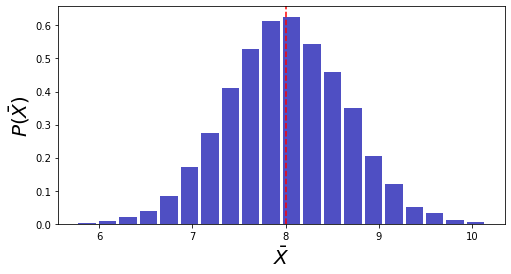

In [34]:
# Gerando as amostras
import numpy as np
import matplotlib.pyplot as plt

mu = 8
sigma = 2
n = 10
Ns = 10000
Xm=[] #distribuicao da media amostral
for s in range(1,Ns):
    x = np.random.normal(mu, sigma, n) # sorteia uma amostra de tamanho n
    Xm.append(np.mean(x))
plt.figure(figsize=(8,4))
a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, label = str(Ns), density=True)
plt.axvline(x=mu, color='r', linestyle='--', label = 'Media')
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.show(True)  

In [35]:
# verificar a fração de observações que permitem que aceitemos $H_0$ para nivel=2%
X = [9.1,9.3,7.2,13.3,10.9,7.2,9.9,8.0,8.6,7.5]
xobs = np.mean(X)


alpha = 98

xc = np.percentile(Xm, alpha)
print('Para nivel de significância:', 100-alpha, '%')
print('Xc=',xc,'  Xobs = ', xobs)
if(xobs < xc):
    print("Aceitamos H0")
else:
    print("Rejeitamos H0")

Para nivel de significância: 2 %
Xc= 9.294886817556845   Xobs =  9.1
Aceitamos H0


3 - Considere a base de dados da flor iris. Realize a seleção de atributos usando teste de hipóteses. Use o classificador Naive Bayes e verifique se o erro na classificação diminui quando usamos 2 atributos selecionados.

In [41]:
from sklearn import datasets

# import data to play with
iris = datasets.load_iris()
X = iris.data  # temos 4 atributos
y = iris.target  # não usaremos o target

In [42]:
X.shape

(150, 4)

In [43]:
# Fazendo a classificação com Naive Bayes
from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 2)

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy: ', model.score(x_test, y_test))

Accuracy:  0.9666666666666667


In [44]:
# Usando Anova para seleção de atributos
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fvalue_selector = SelectKBest(f_classif, k=2) #seleciona os dois atributos mais importantes usando teste de hipoteses

X_kbest = fvalue_selector.fit_transform(X, y)

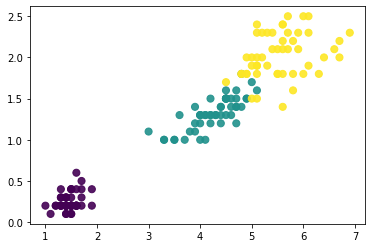

In [45]:
plt.scatter(X_kbest[:,0], X_kbest[:,1], c=y, cmap='viridis', s=50, alpha=0.9)
plt.show(True)

In [46]:
# Realizando a classificação com apenas 2 atributos selecionados
from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X_kbest, y, test_size = p, random_state = 2)

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy: ', model.score(x_test, y_test))

Accuracy:  0.9666666666666667


Notamos que a acurácia com 4 atributos foi igual à com 2 atributos

Consultar p_value, inferência estatística, teste de hipóteses: www.portalaction.com.br